In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('./235745_parking_data/train.csv')
test_df = pd.read_csv('./235745_parking_data/test.csv')
submission_df = pd.read_csv('./235745_parking_data/sample_submission.csv')
age_gender_df = pd.read_csv('./235745_parking_data/age_gender_info.csv')

In [35]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import platform
from matplotlib import font_manager, rc 
sns.set_style('darkgrid')

plt.rcParams["axes.unicode_minus"] = False 
get_ipython().run_line_magic("matplotlib", "inline")

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    rc("font", family="Malgun Gothic")
else:
    print("Unkown system. sorry~~")

In [2]:
train_df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [3]:
len(train_df), len(test_df)

(2952, 1022)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [127]:
# pd.options.display.float_format = '{:,}'.format

In [130]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_df['자격유형'])
train_df['le_자격유형'] = le.transform(train_df['자격유형'])

- 단지코드: C + 4자리번호
- 총세대수: 단지 코드 별 총세대수 (분양 상가, 분양 아파트 포함)
- 임대건물구분 : c(아파트, 상가)
- 지역 : '경상남도', '대전광역시', '경기도', '전라북도', '강원도', '광주광역시', '충청남도', '부산광역시',
       '제주특별자치도', '울산광역시', '충청북도', '전라남도', '경상북도', '대구광역시', '서울특별시',
       '세종특별자치시'
- 공급유형 : '국민임대', '공공임대(50년)', '영구임대', '임대상가', '공공임대(10년)', '공공임대(분납)',
       '장기전세', '공공분양', '행복주택', '공공임대(5년)'
- 전용면적 : 12.62 ~ 583.4 ($m^2?)$
- 전용면적적별세대수 : 전용면적 별 세대수 (분양 상가, 분양 아파트 미포함)
- 공가수 : 단지 코드 별 비어있는 호실 수
- 자격유형 : c('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O')
- 임대보증금 : 원 단위?
- 임대료 : 원 단위?
- 도보 10분거리 내 지하철역 수(환승노선 수 반영) : 0 ~ 3개 (단지 코드별)
- 단지내주차면수 : 13 ~ 1798 개 (단지 코드별)
- 등록차량수 : 13 ~ 2550 개 (단지 코드별)

In [5]:
train_df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [5]:
train_df['단지코드'].unique()

array(['C2483', 'C2515', 'C1407', 'C1945', 'C1470', 'C1898', 'C1244',
       'C1171', 'C2073', 'C2513', 'C1936', 'C2049', 'C2202', 'C1925',
       'C2576', 'C1312', 'C1874', 'C2650', 'C2416', 'C2013', 'C1424',
       'C2100', 'C2621', 'C2520', 'C2319', 'C1616', 'C1704', 'C2258',
       'C1032', 'C2038', 'C1859', 'C1722', 'C1850', 'C2190', 'C1476',
       'C1077', 'C1068', 'C1983', 'C2135', 'C2034', 'C1109', 'C1497',
       'C2289', 'C2597', 'C2310', 'C1672', 'C2132', 'C1439', 'C1613',
       'C2216', 'C1899', 'C1056', 'C2644', 'C1206', 'C2481', 'C1718',
       'C1655', 'C1430', 'C1775', 'C1519', 'C2221', 'C1790', 'C2109',
       'C1698', 'C1866', 'C1005', 'C1004', 'C1875', 'C2156', 'C2212',
       'C2401', 'C2571', 'C1175', 'C1833', 'C2445', 'C1885', 'C2368',
       'C2016', 'C2371', 'C2536', 'C2538', 'C1014', 'C1592', 'C1867',
       'C2326', 'C1015', 'C1620', 'C1049', 'C2000', 'C2097', 'C1668',
       'C1689', 'C1234', 'C2514', 'C1368', 'C1057', 'C2336', 'C1026',
       'C2256', 'C19

In [6]:
def print_na_value(train, test):
    train_copy = train.isna().sum().copy()
    test_copy = test.isna().sum().copy()
    print('='*60)
    print('Train Dataset>>>')
    print(train_copy.loc[train_copy!=0])
    print('='*60)
    print('Test Dataset>>>')
    print(test_copy.loc[test_copy!=0])

In [7]:
print_na_value(train_df, test_df)

Train Dataset>>>
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
dtype: int64
Test Dataset>>>
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
dtype: int64


---

# 데이터 오류

### 1. 전용면적별 세대수 합계와 총세대수가 일치하지 않는 경우  

In [ ]:
#df_train_group_num = train_df[['단지코드', '총세대수', '전용면적별세대수']].pivot_table(index='단지코드', values=['총세대수', '전용면적별세대수'],
#                                                   aggfunc={'총세대수': 'mean', '전용면적별세대수':'sum'})
#df_train_group_num['diff'] = df_train_group_num['총세대수'] - df_train_group_num['전용면적별세대수']

#df_test_group_num = train_df[['단지코드', '총세대수', '전용면적별세대수']].pivot_table(index='단지코드', values=['총세대수', '전용면적별세대수'],
#                                                   aggfunc={'총세대수': 'mean', '전용면적별세대수':'sum'})
#df_test_group_num['diff'] = df_test_group_num['총세대수'] - df_test_group_num['전용면적별세대수']
#df_train_group_num.loc[df_train_group_num['diff'] != 0]

-  (발생 원인) 차이는 분양상가 또는 분양아파트가 임대단지 안에 혼합되어 발생한 것으로, 분양 완료된 상가 ․ 아파트는 관리대상에서 제외되어 전용면적별 세대수에서는 포함되지 않았으나 총세대수에는 포함되었다.

- 방안 : 전용면적별 세대수를 총세대수 sum으로 update

In [32]:
#df_train_group_num = df_train_group_num['총세대수'].reset_index()
#df_train_group_num.rename(columns={'총세대수': '전용면적별세대수'}, inplace=True)

#train_df = train_df[['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '공가수',
#       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
#       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']]
#train_df = train_df.merge(df_train_group_num, on='단지코드')

In [33]:
#test_df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수'],
      dtype='object')

In [34]:
#df_test_group_num = df_test_group_num['총세대수'].reset_index()
#df_test_group_num.rename(columns={'총세대수': '전용면적별세대수'}, inplace=True)

#test_df = test_df[['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '공가수',
#       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
#       '도보 10분거리 내 버스정류장 수', '단지내주차면수']]
#test_df = test_df.merge(df_test_group_num, on='단지코드')

In [35]:
len(train_df), len(test_df)

(2952, 0)

### 2. 동일한 단지에 단지코드가 2개로 부여된 경우
### 3. 단지코드 등 기입 실수로 데이터 정제 과정에서 매칭 오류 발생
- 오류 데이터 삭제

In [8]:
train_excl_code = ['C2085', 'C1397', 'C2431', 'C1649', 'C1036', 'C1095', 'C2051', 'C1218', 'C1894',
                  'C2483', 'C1502', 'C1988']
test_excl_code = ['C2675', 'C2335', 'C1327']

In [9]:
train_df = train_df.loc[train_df['단지코드'].isin(train_excl_code) == False]
test_df = test_df.loc[test_df['단지코드'].isin(test_excl_code) == False]

## 전처리

In [10]:
len(train_df), len(test_df)

(2869, 1008)

In [11]:
print_na_value(train_df, test_df)

Train Dataset>>>
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    207
dtype: int64
Test Dataset>>>
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     38
dtype: int64


In [12]:
train_df.loc[train_df['임대보증금']=='-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2548,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2550,C1326,1934,아파트,부산광역시,국민임대,37.70,464,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2551,C1326,1934,아파트,부산광역시,국민임대,46.94,304,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,-,-,0.0,3.0,338.0,345.0
2681,C1786,480,아파트,강원도,행복주택,26.90,136,25.0,K,-,-,0.0,3.0,338.0,345.0
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,-,-,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,-,-,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,-,-,0.0,8.0,664.0,744.0


In [13]:
print(train_df.loc[train_df['임대보증금'].str.isdecimal()==False, '임대보증금'].unique())
print(test_df.loc[test_df['임대보증금'].str.isdecimal()==False, '임대보증금'].unique())

['-']
['-']


In [14]:
print(train_df.loc[train_df['임대료'].str.isdecimal()==False, '임대료'].unique())
print(test_df.loc[test_df['임대료'].str.isdecimal()==False, '임대료'].unique())

['-']
['-']


In [15]:
train_df.loc[train_df['임대보증금']=='-', '임대보증금'] = np.nan
test_df.loc[test_df['임대보증금']=='-', '임대보증금'] = np.nan
train_df['임대보증금'] = train_df['임대보증금'].astype(float)
test_df['임대보증금'] = test_df['임대보증금'].astype(float)

train_df.loc[train_df['임대료']=='-', '임대료'] = np.nan
test_df.loc[test_df['임대료']=='-', '임대료'] = np.nan
train_df['임대료'] = train_df['임대료'].astype(float)
test_df['임대료'] = test_df['임대료'].astype(float)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2869 entries, 8 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2869 non-null   object 
 1   총세대수                          2869 non-null   int64  
 2   임대건물구분                        2869 non-null   object 
 3   지역                            2869 non-null   object 
 4   공급유형                          2869 non-null   object 
 5   전용면적                          2869 non-null   float64
 6   전용면적별세대수                      2869 non-null   int64  
 7   공가수                           2869 non-null   float64
 8   자격유형                          2869 non-null   object 
 9   임대보증금                         2288 non-null   float64
 10  임대료                           2285 non-null   float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2662 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2869 non-null   float64
 13  단지내

In [17]:
print_na_value(train_df, test_df)

Train Dataset>>>
임대보증금                           581
임대료                             584
도보 10분거리 내 지하철역 수(환승노선 수 반영)    207
dtype: int64
Test Dataset>>>
자격유형                              2
임대보증금                           186
임대료                             186
도보 10분거리 내 지하철역 수(환승노선 수 반영)     38
dtype: int64


In [18]:
print('Train : 임대보증금, 임대료 결측값 : {0:.2f}%'.format(train_df['임대보증금'].isna().sum()/len(train_df)*100))
print('Test : 임대보증금, 임대료 결측값 : {0:.2f}%'.format(test_df['임대보증금'].isna().sum()/len(test_df)*100))

Train : 임대보증금, 임대료 결측값 : 20.25%
Test : 임대보증금, 임대료 결측값 : 18.45%


In [19]:
print('Train : 도보 10분거리 내 지하철역 수 결측값 : {0:.2f}%'.
      format(train_df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isna().sum()/len(train_df)*100))
print('Test : 도보 10분거리 내 지하철역 수 결측값 : {0:.2f}%'.
      format(test_df['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isna().sum()/len(test_df)*100))

Train : 도보 10분거리 내 지하철역 수 결측값 : 7.22%
Test : 도보 10분거리 내 지하철역 수 결측값 : 3.77%


In [20]:
test_df.loc[test_df['자격유형'].isna()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0


In [21]:
test_df.loc[(test_df['단지코드']=='C2411') & (test_df['자격유형'].isna()), '자격유형'] = 'A'
test_df.loc[(test_df['단지코드']=='C2253') & (test_df['자격유형'].isna()), '자격유형'] = 'C'

- test set이지만 데이터값 누락으로 수정

In [22]:
print_na_value(train_df, test_df)

Train Dataset>>>
임대보증금                           581
임대료                             584
도보 10분거리 내 지하철역 수(환승노선 수 반영)    207
dtype: int64
Test Dataset>>>
임대보증금                           186
임대료                             186
도보 10분거리 내 지하철역 수(환승노선 수 반영)     38
dtype: int64


In [77]:
train_df.describe()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
count,2869.000000,2869.000000,2869.000000,2869.000000,2.288000e+03,2.285000e+03,2662.000000,2869.000000,2869.000000,2869.000000
mean,887.654235,44.421394,102.699895,12.915999,2.587165e+07,1.910861e+05,0.181818,3.709655,591.934472,550.127571
std,517.795084,32.072217,133.287517,10.679931,1.955775e+07,1.255029e+05,0.432606,2.676486,391.292702,430.465261
min,26.000000,12.620000,1.000000,0.000000,3.056000e+06,1.665000e+04,0.000000,0.000000,13.000000,13.000000
25%,514.000000,32.100000,14.000000,4.000000,1.440400e+07,1.105300e+05,0.000000,2.000000,277.000000,209.000000
50%,775.000000,39.840000,60.000000,11.000000,2.043450e+07,1.599600e+05,0.000000,3.000000,500.000000,479.000000
75%,1105.000000,51.050000,142.000000,20.000000,3.195925e+07,2.322000e+05,0.000000,4.000000,812.000000,761.000000
max,2568.000000,583.400000,1865.000000,55.000000,2.138630e+08,1.058030e+06,3.000000,20.000000,1798.000000,2550.000000


In [ ]:
train_df

array([[<AxesSubplot:title={'center':'총세대수'}>,
        <AxesSubplot:title={'center':'전용면적'}>,
        <AxesSubplot:title={'center':'전용면적별세대수'}>],
       [<AxesSubplot:title={'center':'공가수'}>,
        <AxesSubplot:title={'center':'임대보증금'}>,
        <AxesSubplot:title={'center':'임대료'}>],
       [<AxesSubplot:title={'center':'도보 10분거리 내 지하철역 수(환승노선 수 반영)'}>,
        <AxesSubplot:title={'center':'도보 10분거리 내 버스정류장 수'}>,
        <AxesSubplot:title={'center':'단지내주차면수'}>],
       [<AxesSubplot:title={'center':'등록차량수'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

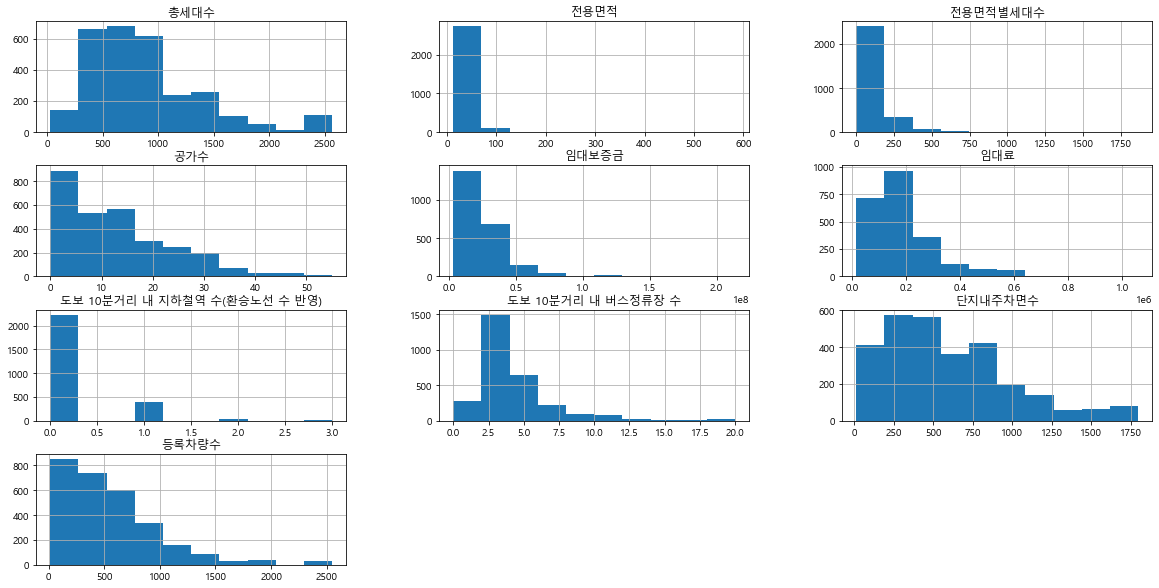

In [25]:
train_df.hist(figsize=(20,10))

In [37]:
numeric_cols = ['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료',
               '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
               '등록차량수']

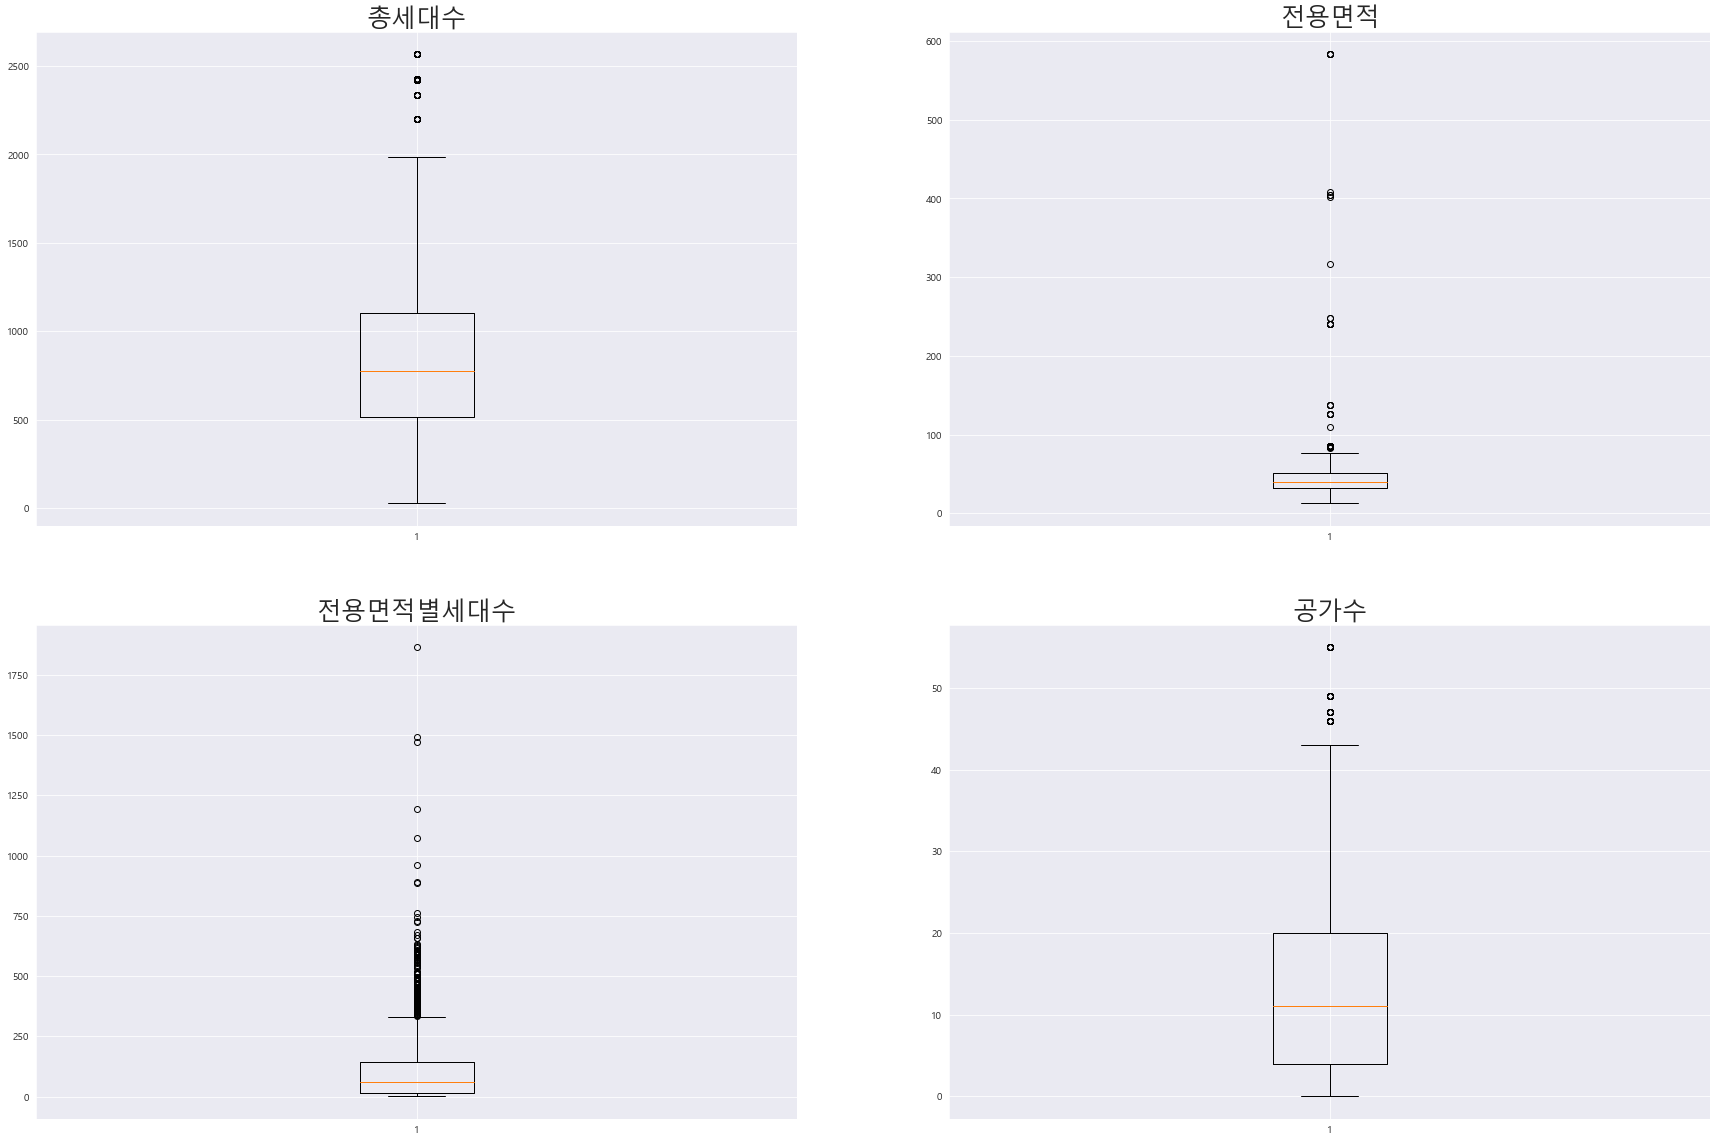

In [57]:
plt.figure(figsize=(30,20))
for i, c in enumerate(numeric_cols[:4]):
    ax = plt.subplot(221+i)
    ax.boxplot(train_df[c])
    ax.set_title(c, fontsize=25)

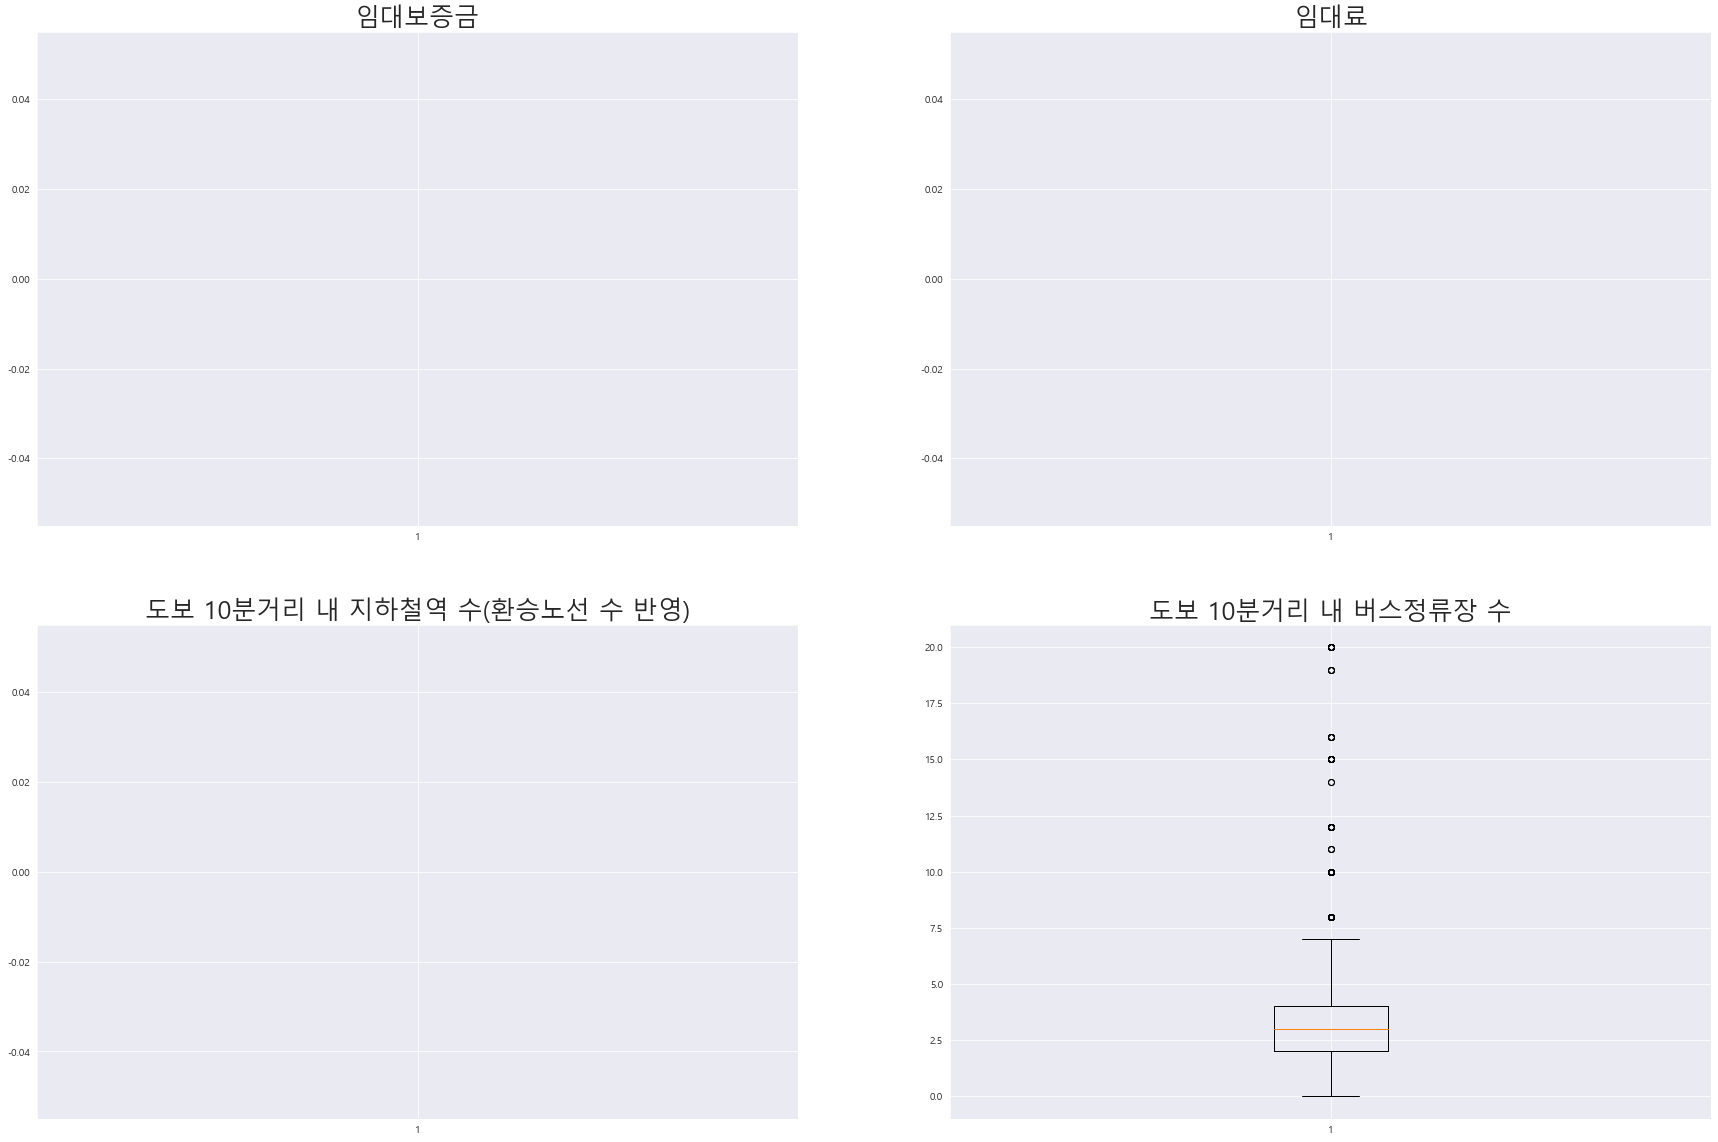

In [58]:
plt.figure(figsize=(30,20))
for i, c in enumerate(numeric_cols[4:8]):
    ax = plt.subplot(221+i)
    ax.boxplot(train_df[c])
    ax.set_title(c, fontsize=25)

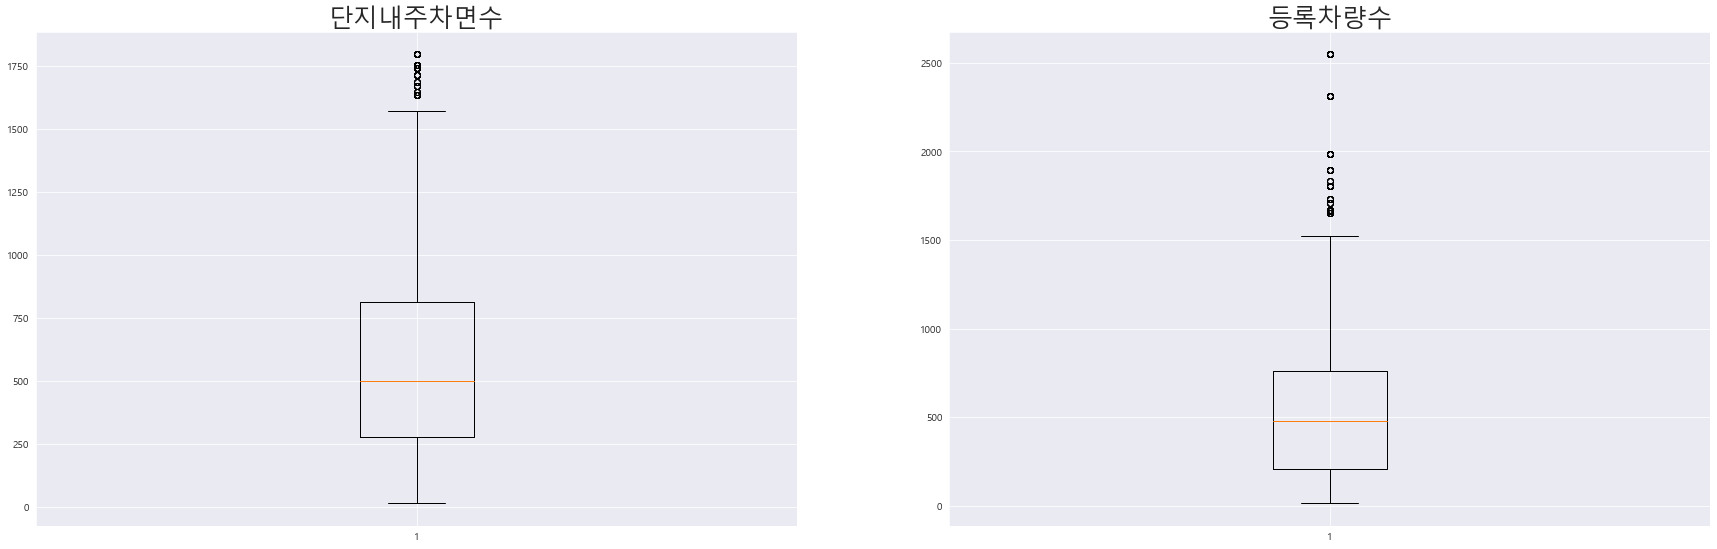

In [59]:
plt.figure(figsize=(30,20))
for i, c in enumerate(numeric_cols[8:]):
    ax = plt.subplot(221+i)
    ax.boxplot(train_df[c])
    ax.set_title(c, fontsize=25)

In [61]:
train_df_interpolate = train_df[numeric_cols].interpolate()

(array([1.929e+03, 7.050e+02, 1.520e+02, 4.800e+01, 1.100e+01, 1.300e+01,
        7.000e+00, 0.000e+00, 1.000e+00, 3.000e+00]),
 array([3.056000e+06, 2.413670e+07, 4.521740e+07, 6.629810e+07,
        8.737880e+07, 1.084595e+08, 1.295402e+08, 1.506209e+08,
        1.717016e+08, 1.927823e+08, 2.138630e+08]),
 <BarContainer object of 10 artists>)

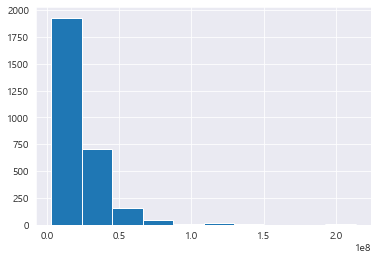

In [69]:
plt.hist(train_df_interpolate['임대보증금'])

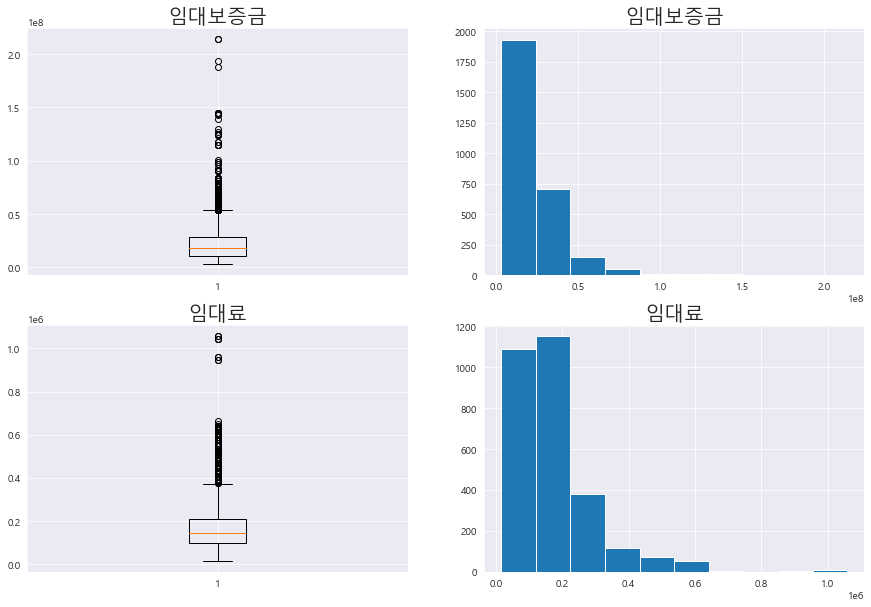

In [76]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.boxplot(train_df_interpolate['임대보증금'])
plt.title('임대보증금', fontsize=20)
plt.subplot(222)
plt.hist(train_df_interpolate['임대보증금'])
plt.title('임대보증금', fontsize=20)

plt.subplot(223)
plt.boxplot(train_df_interpolate['임대료'])
plt.title('임대료', fontsize=20)
plt.subplot(224)
plt.hist(train_df_interpolate['임대료'])
plt.title('임대료', fontsize=20)
plt.show();